# Timeline 

Source: https://spice-spotlight.scot/2021/03/05/timeline-of-coronavirus-covid-19-in-scotland/
* 31 December 2019 - Chinese authorities alert WHO
* 23rd March - people only allowed to go outside to buy food, exercise once a day, or go to work if can't from home
* 24th March - First day of lockdown 
* 29th May - Move to phase 1
* 11th May - people can go outside more than once a day to exercise (household only)
* 19th June - phase 2
* 29th June - Highstreet retail open, safe return Uni announced
* 29th June <-> 13th July - Free bikes for first 30 mins
* 3rd July - 5 mile rule travel distance relaxed 
* 6th July - Outdoor hospitality opens 
* 8 July - can meet with two different households up to 8 people 
* 10 July - move to phase 3 (in doors up to 8 people, overnight allowed) 
* 13 July - dentists, shopping centers allowed to open
* 15 July - pubs, resteraunts, holiday accomadtion allowed to open 
* 16 July - no physical distancing allowed between primary and secondary school 
* 20 July - oxford show paper that vaccine working (confidence in public increases?)
* 11 August - Schools reopen
* 20 August - Scotlant remains in Stage 3
* 27 August - Police granted power to stop household parties 
* 10 Septemeber - limiiting indoor and outdoor gatherings to 6 people 
* 21 September - University of Edinburgh starts
* 22 Sep - national curfew for pubs and restaurants 
* 7 October - hospitality restriced to 6am to 6pm no sale alcohol indoors, premises may open outdoors until 10pm, with sales of alcohol. All licensed premises in the central belt area will be required to close, with the exception of takeaway services. Outdoor live events, adult contact sports and indoor group exercise classes (18+) are to be paused
* 9 November - '90% protection' vaccine announced 
* 17 November - Edinburgh remains level 3
* 8 december - Plans to start vaccinations 
* 30 December - Scottish Government urge the public to stay home during Hogmanay to suppress COVID-19.
* 5 January - Scottish Government announce mainland Scotland is to go into lockdown from 5 January 2021 with a new legal requirement forbidding anyone from leaving their home except for essential purposes. Suspension of all travel corridors
* 16 January - Lockdown restrictions strengthened
* 5 Feburary - mandatory hotel quarantine announced for 15 Feb when traveling from banned countries 
* 2 march - announcement for primary school children to return to school

# Key things to look for
* We can assume dates before 2020 are valid as a comparison for pre-COVID days. 
* Is there a sudden drop in activity at the initial lockdown?
* What about transition phase; did people begin to get cautious with all the talk before official lockdown?
* Is there a clear point where public confidence grows and they stop caring about the restrictions?
* We'd expect biking activity to increase mid July due to a lot of lifted restrictions, does data reflect this? 
* What is night time activity on bikes like before and after the early closing of restaurants and pubs?
* Does bike activity increase when people are allowed to go and exercise?
* People are forbidden to leave hom from 5th January -- does data reflect this? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
if False:
    # download the datasets
    URL = 'https://data.urbansharing.com/edinburghcyclehire.com/trips/v1/{}/{:02d}.json'
    months_2019 = [pd.read_json(URL.format('2019', month)) for month in range(1, 13)]
    months_2020 = [pd.read_json(URL.format('2020', month)) for month in range(1, 13)]
    pd.concat(months_2019, ignore_index=True).to_pickle('datasets/trips_2019.pkl')
    pd.concat(months_2020, ignore_index=True).to_pickle('datasets/trips_2020.pkl')
    
trips_2019 = pd.read_pickle('datasets/trips_2019.pkl')
trips_2020 = pd.read_pickle('datasets/trips_2020.pkl')

In [3]:
trips_2019

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2019-01-01 05:58:47.853000+00:00,2019-01-01 07:16:14.003000+00:00,4646,259,St Andrew Square,North East corner,55.954749,-3.192774,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351
1,2019-01-01 06:02:13.573000+00:00,2019-01-01 07:21:17.799000+00:00,4744,259,St Andrew Square,North East corner,55.954749,-3.192774,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351
2,2019-01-01 06:14:09.702000+00:00,2019-01-01 07:21:57.806000+00:00,4068,251,Waverley Station,Platform level near Calton Road Exit,55.952641,-3.187527,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351
3,2019-01-01 06:25:08.003000+00:00,2019-01-01 06:36:22.831000+00:00,674,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965040,-3.176686,284,Leith Links,Corner of Vanburgh Place and Lochend Road,55.969199,-3.166885
4,2019-01-01 06:54:31.775000+00:00,2019-01-01 06:59:52.605000+00:00,320,251,Waverley Station,Platform level near Calton Road Exit,55.952641,-3.187527,261,Brunswick Place,Junction Brunswick Street and Elm Row,55.960930,-3.181005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121105,2019-12-30 22:46:51.119000+00:00,2019-12-30 23:07:29.113000+00:00,1237,1098,Marchmont Crescent,Corner of Marchmont Road,55.936432,-3.194150,251,Waverley Station,Platform level near Calton Road Exit,55.952641,-3.187527
121106,2019-12-30 22:58:21.713000+00:00,2019-12-30 23:14:11.583000+00:00,949,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351,1769,Brunswick Place,Corner of Elm Row/Brunswick Street,55.960852,-3.180986
121107,2019-12-30 23:35:33.033000+00:00,2019-12-30 23:45:05.715000+00:00,572,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589,1738,Wester Coates Terrace,Junction with Roseburn Terrace,55.945648,-3.231847
121108,2019-12-30 23:41:48.318000+00:00,2019-12-30 23:51:45.413000+00:00,597,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589


In [4]:
trips_2020

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2020-01-01 00:11:49.789000+00:00,2020-01-01 00:32:37.402000+00:00,1247,1738,Wester Coates Terrace,Junction with Roseburn Terrace,55.945648,-3.231847,1725,Edinburgh Zoo,"Corstorphine Road, Edinburgh",55.942115,-3.269287
1,2020-01-01 00:15:47.185000+00:00,2020-01-01 00:24:48.541000+00:00,541,1024,Meadow Place,End of Meadow Place,55.940238,-3.194640,265,Meadows East,Between Melville Terrace and Sciennes,55.939809,-3.182739
2,2020-01-01 00:21:32.841000+00:00,2020-01-01 01:02:45.899000+00:00,2473,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,259,St Andrew Square,North East corner,55.954906,-3.192444
3,2020-01-01 00:24:10.267000+00:00,2020-01-01 01:02:52.413000+00:00,2322,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,259,St Andrew Square,North East corner,55.954906,-3.192444
4,2020-01-01 00:46:13.134000+00:00,2020-01-01 01:01:06.431000+00:00,893,1756,Western General Hospital,Porterfield Road,55.963454,-3.232909,1095,Dudley Gardens,Opposite Victoria Park on Newhaven Road,55.975940,-3.191321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226542,2020-12-30 22:03:58.774000+00:00,2020-12-30 23:12:02.346000+00:00,4083,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589,1039,Lothian Road,Outside the Usher Hall,55.947409,-3.205765
226543,2020-12-30 22:04:54.594000+00:00,2020-12-30 23:12:17.881000+00:00,4043,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589,1039,Lothian Road,Outside the Usher Hall,55.947409,-3.205765
226544,2020-12-30 22:13:20.540000+00:00,2020-12-30 23:10:14.763000+00:00,3414,2265,Musselburgh Brunton Hall,Adjacent to the Brunton Theatre,55.943961,-3.058307,2265,Musselburgh Brunton Hall,Adjacent to the Brunton Theatre,55.943961,-3.058307
226545,2020-12-30 22:14:33.529000+00:00,2020-12-30 23:10:22.243000+00:00,3348,2265,Musselburgh Brunton Hall,Adjacent to the Brunton Theatre,55.943961,-3.058307,2265,Musselburgh Brunton Hall,Adjacent to the Brunton Theatre,55.943961,-3.058307


In [5]:
# check for any missing values
print(trips_2019.isnull().values.any())
print(trips_2020.isnull().values.any())
print(len(trips_2020[trips_2020.isnull().values]))
descriptions = trips_2020[['start_station_description', 'end_station_description']]
print(len(descriptions[descriptions.isnull().values]))
# confirmation that all null values were contained in only the start and end descriptions

False
True
5438
5438


Note: this is all just for exploring and of course not how we will finally present (or even use)

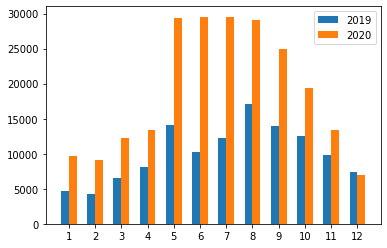

In [6]:
# number of trips 
x = np.arange(12)
width = 0.3
months = range(1, 13)
ax = plt.subplot()
ax.bar(x - width/2, [len(trips_2019[trips_2019.started_at.dt.month == x]) for x in months],
       width=width, label='2019')
ax.bar(x + width/2, [len(trips_2020[trips_2020.started_at.dt.month == x]) for x in months],
       width=width, label='2020')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

# On the 11th of may people are allowed to go outside to exercise and we see an almost double increase in bike usage
# Lifted restrictions happened mid July, but people were just as active before that. 
# Since number of trips are already higher than the previous year at start of 2020, we may need to take into account
# that the bikes may naturally have been getting more popular. 
# last year there was a dip in summer months when people normally go abroad for vacation. With lockdown, it stays 
# completely flat, indicating that everyone is still there in Edinburgh

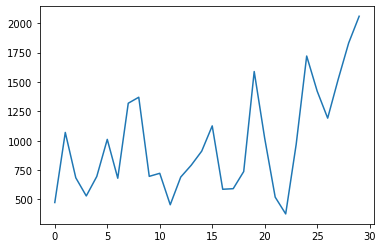

In [7]:
# does number of trips in May correspond to announcement?
may_covid = trips_2020[trips_2020.started_at.dt.month == 5]
trips_per_day = [len(may_covid[may_covid.started_at.dt.day == x]) for x in range(1, 31)]
plt.plot(trips_per_day)
# not really lol
# bike usage tends to go down on weekends, would imply people mainly use them for commute and not pleasure

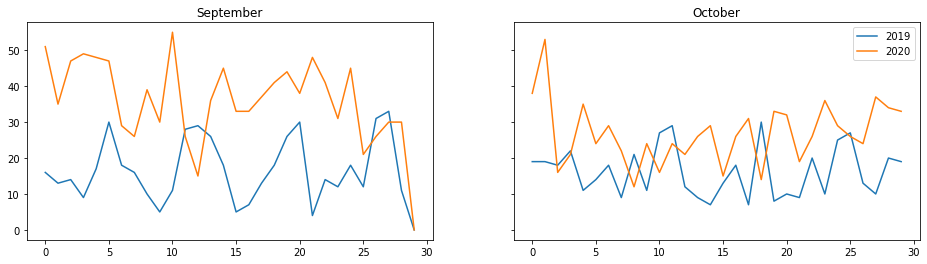

In [8]:
# what about number of post 10 pm rides before and after curfew? 
def late_night_trips(month):
    late_2019 = trips_2019[(trips_2019.started_at.dt.month == month) & (trips_2019.started_at.dt.hour >= 22)]
    late_2020 = trips_2020[(trips_2020.started_at.dt.month == month) & (trips_2020.started_at.dt.hour >= 22)]
    late_per_day_2019 = [len(late_2019[late_2019.started_at.dt.day == x]) for x in range(1, 31)]
    late_per_day_2020 = [len(late_2020[late_2020.started_at.dt.day == x]) for x in range(1, 31)] 
    return late_per_day_2019, late_per_day_2020

late_sep_2019, late_sep_2020 = late_night_trips(9)
late_oct_2019, late_oct_2020 = late_night_trips(10)
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16,4))
axs[0].plot(late_sep_2019, label='2019')
axs[0].plot(late_sep_2020, label='2020')
axs[0].set_title('September')
axs[1].plot(late_oct_2019, label='2019')
axs[1].plot(late_oct_2020, label='2020')
axs[1].set_title('October')
plt.legend()
# curfew happens on 22'nd of septermber so kinda yeah
# it drops down to same amount as previous year (unusual) and stays there for coulple weeks before seperating again

In [9]:
# what were the most popular locations pre and post covid? 
print('2019:')
print(trips_2019['start_station_name'].value_counts())
print('\n2020:')
print(print(trips_2020['start_station_name'].value_counts()))
# Honestly don't know places in Edinburgh well enough to spot anything interesting here
# But if Portobello is a beach, I think that says a lot
# the places are definetely a lot more picturesque
# for final project we need to map lat and long to indicate how many start locations were done where

2019:
Bristo Square                                          6393
St Andrew Square                                       5283
Meadows East                                           5039
Castle Street                                          3823
Portobello                                             3421
                                                       ... 
Fort Kinnaird                                             3
Depot Virtual                                             3
Pleasance - Edinburgh University Sports Fair              2
Royal Highland Show - West Gate (19th to 23rd June)       1
Cycling Scotland Conference                               1
Name: start_station_name, Length: 138, dtype: int64

2020:
Portobello - Kings Road                                    8224
Meadows East                                               7955
Meadow Place                                               6608
Duke Street                                                5864
Victoria Quay      

In [10]:
# compare bike rides from certain location 
location = 'Heriot Watt - Edinburgh Business School'
print('full 2019:', trips_2019['start_station_name'].value_counts()[location])
print('full 2020:', trips_2020['start_station_name'].value_counts()[location])
# what about first semester vs second semester? 
sem1_2020 = trips_2020[trips_2020.started_at.dt.month < 5]
sem2_2020 = trips_2020[trips_2020.started_at.dt.month > 8]
print('sem 1 2020:', sem1_2020['start_station_name'].value_counts()[location])
print('sem 2 2020:', sem2_2020['start_station_name'].value_counts()[location])

full 2019: 53
full 2020: 665
sem 1 2020: 89
sem 2 2020: 308


Text(0.5, 1.0, '2020')

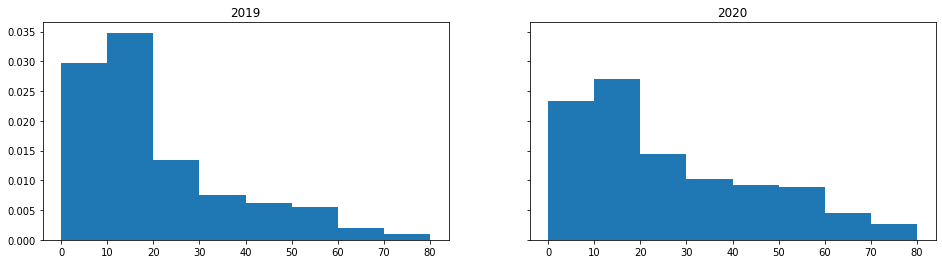

In [11]:
# What is the percentage breakdown of duration of trips each year? 
trips_duration_2019 = trips_2019['duration'] / 60 # now in minutes 
trips_duration_2020 = trips_2020['duration'] / 60
bins = range(0, 90, 10)
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16,4))
axs[0].hist(trips_duration_2019, density=True, bins=bins)
axs[0].set_title('2019')
axs[1].hist(trips_duration_2020, density=True, bins=bins)
axs[1].set_title('2020')
# hmmm, I guess useful? 

In [12]:
# ------ PROCESSING ------
# Need to determine if a station got replaced in December and if it did what to. 
# For fair comparison we can combine all station locations in 2019 set that don't
# exist in the 2020 set to the closest location that does. (In most cases this will
# be the exact same location that has just been updated, but even if its not it 
# still makes sense to do this for fair comparison). 

trips_2019 = trips_2019[trips_2019.end_station_latitude > 55] # first removing the 3 trips that end in liverpool

def get_unique_coordinates(trips):
    starts = set(zip(trips.start_station_latitude, trips.start_station_longitude))
    ends = set(zip(trips.end_station_latitude, trips.end_station_longitude))
    unique = starts | ends
    return list(unique)
    
coordinates_2019 = get_unique_coordinates(trips_2019)
coordinates_2020 = get_unique_coordinates(trips_2020)

columns = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
trips_2019_replaced = trips_2019[columns]

def find_closest_coordinate(coordinate, valid_coordinates):
    
    def distance(x, y):
        return (x[0] - y[0])**2 + (x[1] - y[1])**2
    
    min_distance = float('inf')
    min_coordinate = None
    for valid_coordinate in valid_coordinates:
        dist = distance(coordinate, valid_coordinate)
        if dist < min_distance:
            min_distance = dist
            min_coordinate = valid_coordinate
    return min_coordinate

for coordinate in coordinates_2019:
    if coordinate not in coordinates_2020:
        closest = find_closest_coordinate(coordinate, coordinates_2020)
        old_start = {'start_station_latitude': coordinate[0], 'start_station_longitude': coordinate[1]}
        new_start = {'start_station_latitude': closest[0], 'start_station_longitude': closest[1]}
        old_end = {'end_station_latitude': coordinate[0], 'end_station_longitude': coordinate[1]}
        new_end = {'end_station_latitude': closest[0], 'end_station_longitude': closest[1]}
        trips_2019_replaced = trips_2019_replaced.replace(old_start, new_start)
        trips_2019_replaced = trips_2019_replaced.replace(old_end, new_end)

trips_2019_replaced

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,55.954906,-3.192444,55.981286,-3.176351
1,55.954906,-3.192444,55.981286,-3.176351
2,55.952641,-3.187527,55.981286,-3.176351
3,55.965040,-3.176686,55.969012,-3.167395
4,55.952641,-3.187527,55.960852,-3.180986
...,...,...,...,...
121105,55.936432,-3.194150,55.952641,-3.187527
121106,55.981286,-3.176351,55.960852,-3.180986
121107,55.939710,-3.220589,55.945648,-3.231847
121108,55.952335,-3.207101,55.939710,-3.220589


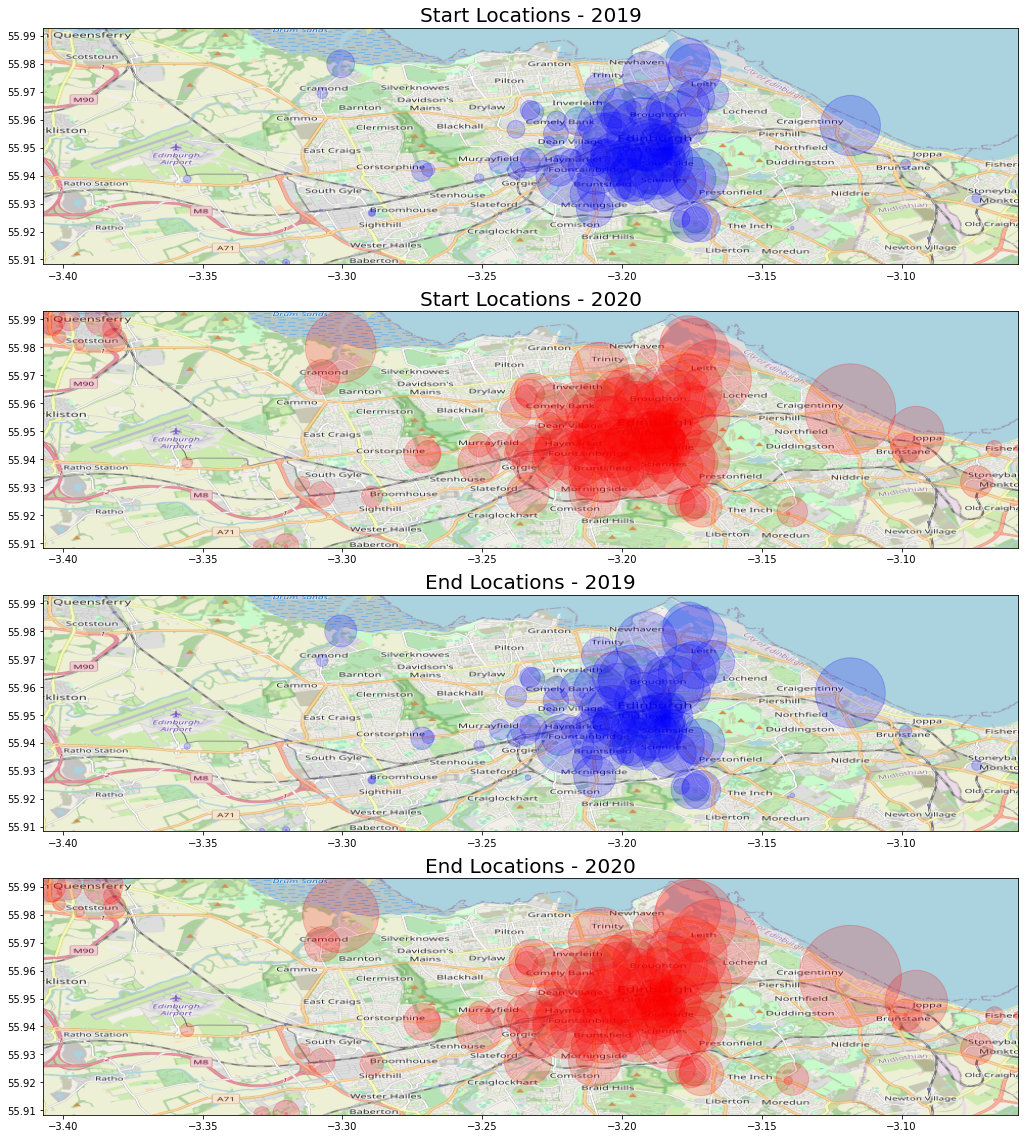

In [13]:
# Heat map -- want to create a map of Edinburgh where we plot all bike locations with a dot representative of how
# many trips were made there each year

def get_location_info(trips, pos):
    locs = trips[[f'{pos}_station_latitude', f'{pos}_station_longitude']]
    locs = locs.value_counts().to_frame().reset_index()
    locs.columns = ['latitude', 'longitude', 'counts']
    return locs

starts_2019 = get_location_info(trips_2019_replaced, 'start')
ends_2019   = get_location_info(trips_2019_replaced, 'end')
starts_2020 = get_location_info(trips_2020, 'start')
ends_2020   = get_location_info(trips_2020, 'end')

# recievie min and max lat and long for determining size of map we need
map_size = {'min_long': float('inf'), 'max_long': float('-inf'), 'min_lat': float('inf'), 'max_lat': float('-inf')}

for df in [starts_2019, ends_2019, starts_2020, ends_2020]:
    if df.latitude.min() < map_size['min_lat']:
        map_size['min_lat'] = df.latitude.min()
    if df.longitude.min() < map_size['min_long']:
        map_size['min_long'] = df.longitude.min()
    if df.latitude.max() > map_size['max_lat']:
        map_size['max_lat'] = df.latitude.max()
    if df.longitude.max() > map_size['max_long']:
        map_size['max_long'] = df.longitude.max()
        
# at this point I entered the min/max lat/long coordinates into opestreetmap.org and downloaded map as 'map.png'

edinburgh_map = plt.imread('map.png') # with boundaries according to map_size

fig, axs = plt.subplots(4, 1, figsize=(60, 20))
alpha = 0.2
title_size = 20

for i in range(4):
    axs[i].set_xlim(map_size['min_long'], map_size['max_long'])
    axs[i].set_ylim(map_size['min_lat'], map_size['max_lat'])
    axs[i].imshow(edinburgh_map, zorder=0, extent=map_size.values(), aspect='equal')

axs[0].scatter(starts_2019.longitude, starts_2019.latitude, s=starts_2019.counts, alpha=alpha, c='b')
axs[0].set_title('Start Locations - 2019', fontsize=title_size)

axs[1].scatter(starts_2020.longitude, starts_2020.latitude, s=starts_2020.counts, alpha=alpha, c='r')
axs[1].set_title('Start Locations - 2020', fontsize=title_size)

axs[2].scatter(ends_2019.longitude, ends_2019.latitude, s=ends_2019.counts, alpha=alpha, c='b')
axs[2].set_title('End Locations - 2019', fontsize=title_size)

axs[3].scatter(ends_2020.longitude, ends_2020.latitude, s=ends_2020.counts, alpha=alpha, c='r')
axs[3].set_title('End Locations - 2020', fontsize=title_size)


plt.show()

# Things we can potentially add:
# * Percentage increase in some of popular rural areas -- are these percentage increases greater than the 
#   percentage increases for locations in the city. 
# * Check whether the locations in top left existed in 2019 (I'm guessing they didn't rather than no one using them.)
#   - we could do all our comparisons based on only locations that were shared across both years. 
# * Experiment with both on same map

In [14]:
# Look at the average increase per location as we need to take into account the general increase in bike usage
# Then look at the percentage increase of the outer more scenic locations. 

starts = pd.merge(starts_2019, starts_2020, on=['latitude', 'longitude'])
ends = pd.merge(ends_2019, ends_2020, on=['latitude', 'longitude'])
starts.columns = ['latitude', 'longitude', 'counts_2019', 'counts_2020']
ends.columns = ['latitude', 'longitude', 'counts_2019', 'counts_2020']

starts['change'] = starts.apply(lambda x : x.counts_2020 - x.counts_2019, axis=1)
ends['change'] = ends.apply(lambda x : x.counts_2020 - x.counts_2019, axis=1)

starts['percentage_increase'] = starts.apply(lambda x : (x.change / x.counts_2019) * 100, axis=1)
ends['percentage_increase'] = ends.apply(lambda x : (x.change / x.counts_2019) * 100, axis=1)

print('average change for starts:', starts['change'].mean())
print('average change increase for ends:', ends['change'].mean())
print('average percentage increase for starts:', starts['percentage_increase'].mean())
print('average percentage increase for ends:', ends['percentage_increase'].mean())
starts
# some low counts in 2019 completely ruin the average percentage increase...perhaps get rid of them? 

average change for starts: 842.8526315789474
average change increase for ends: 821.40625
average percentage increase for starts: 1440.2285493449976
average percentage increase for ends: 1784.5655441859808


,latitude,longitude,counts_2019,counts_2020,change,percentage_increase
0,55.945834,-3.189053,6393,3984,-2409.0,-37.681840
1,55.954906,-3.192444,5283,4625,-658.0,-12.455044
2,55.939809,-3.182739,5039,7955,2916.0,57.868625
3,55.951501,-3.203184,3823,3717,-106.0,-2.772692
4,55.957915,-3.118332,3639,8224,4585.0,125.996153
...,...,...,...,...,...,...
90,55.921220,-3.139076,12,921,909.0,7575.000000
91,55.955248,-3.172216,6,3700,3694.0,61566.666667
92,55.945046,-3.250881,6,545,539.0,8983.333333
93,55.908823,-3.320113,5,653,648.0,12960.000000


In [15]:
def get_coordinates(station_id=None, name=None):
    if station_id is not None:
        lat = trips_2020.loc[trips_2020.start_station_id == station_id, 'start_station_latitude'].iloc[0]
        long = trips_2020.loc[trips_2020.start_station_id == station_id, 'start_station_longitude'].iloc[0]
        return lat, long
    elif name is not None:
        lat = trips_2020.loc[trips_2020.start_station_name == name, 'start_station_latitude'].iloc[0]
        long = trips_2020.loc[trips_2020.start_station_name == name, 'start_station_longitude'].iloc[0]
        return lat, long

def display_location_stats(name):
    lat, long = get_coordinates(name=name)
    print(f'{name}, starts:')
    display(starts[(starts.latitude == lat) & (starts.longitude == long)])
    print(f'{name}, ends:')
    display(ends[(ends.latitude == lat) & (ends.longitude == long)])
    
# both of these have changes well above average. Can we do something with that?
display_location_stats('Cramond Foreshore')
display_location_stats('Portobello - Kings Road')

Cramond Foreshore, starts:


,latitude,longitude,counts_2019,counts_2020,change,percentage_increase
53,55.980031,-3.300642,777,5010,4233.0,544.787645


Cramond Foreshore, ends:


,latitude,longitude,counts_2019,counts_2020,change,percentage_increase
46,55.980031,-3.300642,1026,5790,4764.0,464.327485


Portobello - Kings Road, starts:


,latitude,longitude,counts_2019,counts_2020,change,percentage_increase
4,55.957915,-3.118332,3639,8224,4585.0,125.996153


Portobello - Kings Road, ends:


,latitude,longitude,counts_2019,counts_2020,change,percentage_increase
0,55.957915,-3.118332,4894,10422,5528.0,112.954638
